# Question-1]Problem statement.

Build a recommender system by using cosine simillarties score.


In [76]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [77]:
df=pd.read_csv("E:\\data scines\\Assignment-Data sciencs\\Recommendaction\\book (1).csv",sep=',',error_bad_lines=False,encoding='latin-1')
print(df)

      Unnamed: 0  User.ID                                         Book.Title  \
0              1   276726                                Classical Mythology   
1              2   276729                                       Clara Callan   
2              3   276729                               Decision in Normandy   
3              4   276736  Flu: The Story of the Great Influenza Pandemic...   
4              5   276737                             The Mummies of Urumchi   
...          ...      ...                                                ...   
9995        9996   162121       American Fried: Adventures of a Happy Eater.   
9996        9997   162121                              Cannibal In Manhattan   
9997        9998   162121                    How to Flirt: A Practical Guide   
9998        9999   162121                                           Twilight   
9999       10000   162129                       Kids Say the Darndest Things   

      Book.Rating  
0               5  

In [7]:
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


# EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [9]:
df.shape

(10000, 4)

In [10]:
df.dtypes

Unnamed: 0      int64
User.ID         int64
Book.Title     object
Book.Rating     int64
dtype: object

In [12]:
df.isnull().sum()

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [13]:
df.describe()

,Unnamed: 0,User.ID,Book.Rating
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,95321.249800,7.56630
std,2886.89568,117645.703609,1.82152
min,1.00000,8.000000,1.00000
25%,2500.75000,2103.000000,7.00000
50%,5000.50000,3757.000000,8.00000
75%,7500.25000,162052.000000,9.00000
max,10000.00000,278854.000000,10.00000


In [14]:
df.corr()

,Unnamed: 0,User.ID,Book.Rating
Unnamed: 0,1.000000,-0.406308,-0.000228
User.ID,-0.406308,1.000000,-0.041523
Book.Rating,-0.000228,-0.041523,1.000000


In [16]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [17]:
df.drop(df.columns[[0]],axis=1,inplace=True)

In [18]:
df

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [20]:
df.nunique()

User.ID        2182
Book.Title     9659
Book.Rating      10
dtype: int64

Renaming the Columns


In [21]:
df.columns = ["UserID","BookTitle","BookRating"]

In [22]:
df

,UserID,BookTitle,BookRating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [23]:
df = df.sort_values(by=['UserID'])

Number of unique users in the dataset


In [25]:
len(df.UserID.unique())

2182

Number of Unique Movies

In [26]:
len(df.BookTitle.unique())

9659

Visualization

In [28]:
df.loc[df["BookRating"] == 'small','BookRating'] = 0
df.loc[df["BookRating"] == 'large','BookRating'] = 1

Book Ratings by Readers(1 to 10)


In [30]:
df.BookRating.value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: BookRating, dtype: int64

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


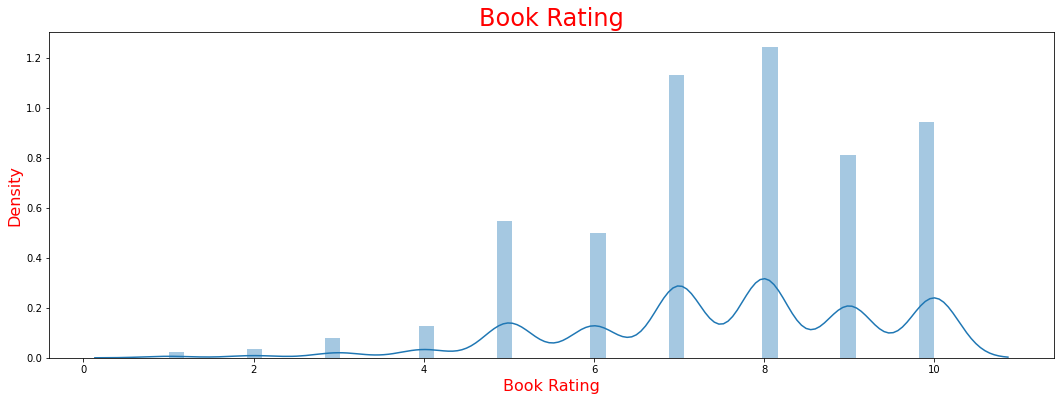

In [32]:
plt.figure(figsize=(18,6))
sns.distplot(df.BookRating)
plt.title('Book Rating',color='red',fontsize=24)
plt.xlabel('Book Rating',color='red',fontsize=16)
plt.ylabel('Density',color='red',fontsize=16)
plt.show()


In [44]:
book_df1 = df.pivot_table(index='UserID',columns='BookTitle',values='BookRating').reset_index(drop=True)

In [46]:
book_df1.fillna(0,inplace=True)

In [47]:
book_df1

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Average Rating of Books

In [49]:
average = df['BookRating'].mean()
average

7.5663

Calculating the minimum number of votes required to be in the chart

In [52]:
minimum = df['BookRating'].quantile(0.90)
minimum

10.0

Filter out all the qualified Books into a new DataFrame

In [53]:
q_Books = df.copy().loc[df['BookRating'] >= minimum]
q_Books.shape

(1732, 3)

# Cosine Similarity¶

In [54]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
from scipy.spatial.distance import correlation

In [56]:
sim = 1-pairwise_distances(book_df1.values,metric='cosine')
sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Making DataFrame

In [58]:
sim_df = pd.DataFrame(sim)
sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Set the index and column names to user id's¶

In [61]:
sim_df.index = df.UserID.unique()
sim_df.index

Int64Index([     8,      9,     10,     12,     14,     16,     17,     19,
                22,     26,
            ...
            278831, 278832, 278836, 278843, 278844, 278846, 278849, 278851,
            278852, 278854],
           dtype='int64', length=2182)

In [63]:
sim_df.columns =df.UserID.unique()
sim_df.columns

Int64Index([     8,      9,     10,     12,     14,     16,     17,     19,
                22,     26,
            ...
            278831, 278832, 278836, 278843, 278844, 278846, 278849, 278851,
            278852, 278854],
           dtype='int64', length=2182)

In [64]:
sim_df

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
import numpy as np

In [67]:
np.fill_diagonal(sim,0)
sim_df

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Most Similar Users

In [68]:
print(sim_df.max(axis=1)[1348])
print(sim_df.max(axis=1).sort_values(ascending=False).head(50))

0.7525766947068778
3951      1.000000
1559      1.000000
162063    1.000000
278206    1.000000
2070      1.000000
2355      1.000000
277284    1.000000
278161    1.000000
276934    1.000000
278131    1.000000
278110    1.000000
162004    1.000000
705       1.000000
698       1.000000
160926    1.000000
933       1.000000
1326      1.000000
2576      1.000000
276850    1.000000
3952      1.000000
161645    1.000000
1348      0.752577
276780    0.707107
86        0.707107
278675    0.668965
276800    0.668965
277244    0.662266
278244    0.662266
278197    0.613941
278013    0.613941
3601      0.549972
277619    0.549972
277585    0.515325
277622    0.515325
276814    0.502571
277240    0.502571
278648    0.500000
277938    0.498464
2077      0.498464
508       0.495904
3874      0.495904
278012    0.476290
276744    0.476290
2520      0.463241
4225      0.463241
4049      0.453638
4207      0.453638
1192      0.437426
277660    0.437426
161880    0.384900
dtype: float64


>1 represents that the two users ID have read the same books.

>1348 has highest correlation with 2576 UserID

In [71]:
reader = df[(df['UserID']==1348) | (df['UserID']==2576)]
reader

,UserID,BookTitle,BookRating
3915,1348,Fantastic Beasts and Where to Find Them,7
3916,1348,Stardust,8
5699,2576,Stardust,10


In [74]:
reader1 = df[(df['UserID']==1348)]
reader1

,UserID,BookTitle,BookRating
3915,1348,Fantastic Beasts and Where to Find Them,7
3916,1348,Stardust,8


In [75]:
reader2 = df[(df['UserID']==2576)]
reader2

,UserID,BookTitle,BookRating
5699,2576,Stardust,10


 Book "Stardust" whose UserID 2576 has Maximum Rating 10.